# Análise Exploratória de Dados (EDA): PProductions

## 1° Passo Uniformizar os Dados em Colunas Usando a Biblioteca Pandas

In [2]:
# importando  bibliotecas Necessaárias para Análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pickle


In [23]:
'''# importando arquivo do google drive
from google.colab import drive
drive.mount('/content/drive')
# Uniformizando a planilha em colunas e armazenando na variável 'df'
#df= pd.read_csv('/content/drive/My Drive/desafio_indicium_imdb.csv', sep=",")
df = pd.read_csv('/content/drive/My Drive/df/dfbruto.csv', sep=",")'''
import pandas as pd

# Carrega o DataFrame do arquivo baixado no Colab
df = pd.read_csv('/content/dfbruto.csv', sep=",")

# ... (resto do seu código para limpar e tratar a coluna "Gross")

In [24]:
print(df)
df.to_csv('seu_arquivo_limpo.csv', index=False)

     Unnamed: 0                                   Series_Title Released_Year  \
0             1                                  The Godfather          1972   
1             2                                The Dark Knight          2008   
2             3                         The Godfather: Part II          1974   
3             4                                   12 Angry Men          1957   
4             5  The Lord of the Rings: The Return of the King          2003   
..          ...                                            ...           ...   
994         995                         Breakfast at Tiffany's          1961   
995         996                                          Giant          1956   
996         997                          From Here to Eternity          1953   
997         998                                       Lifeboat          1944   
998         999                                   The 39 Steps          1935   

    Certificate  Runtime               

### 1.2 : Limpar os Dados Para Que Fiquem Uniformes Para Análise

In [25]:
'''#1. Convertendo a Coluna "Released_Year" para numérico e "Gross" para float
#df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors='coerce')
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors='coerce')

# Removendo os caracteres não numéricos de "Gross" antes da conversão
chars_to_remove = [',', '$']
cols_to_clean = ['Gross']
for item in chars_to_remove:
    for col in cols_to_clean:

            df["Gross"] = pd.to_numeric(df["Gross"], errors='coerce')

            # 2. Tratando os  valores ausentes
            # Preenchendo a Coluna "Certificate" com a moda
            df["Certificate"].fillna(df["Certificate"].mode()[0], inplace=True)

            # Preenchendo a Coluna "Meta_score" com a mediana
            df["Meta_score"].fillna(df["Meta_score"].median(), inplace=True)

            # Tratando valores ausentes nas Colunas "Released_Year" e "Gross"
            df["Released_Year"].fillna(df["Released_Year"].median(), inplace=True)
            df["Gross"].fillna(df["Gross"].median(), inplace=True)

            # Imprime as primeiras linhas do dataframe limpo para verificação
            print(df.head())'''



import pandas as pd

# Carrega o DataFrame (substitua 'seu_arquivo.csv' pelo nome do seu arquivo)

# 1. Limpeza e Conversão da Coluna "Released_Year"
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# 2. Limpeza e Conversão da Coluna "Gross"
df['Gross'] = df['Gross'].astype(str)  # Garante que a coluna seja string
df['Gross'] = df['Gross'].str.replace(r'[^0-9.]', '', regex=True).str.strip()  # Remove caracteres especiais e espaços
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')  # Converte para numérico

# 3. Tratando Valores Ausentes
# ... (seu código para tratar valores ausentes)

# 4. Verificação dos Resultados (Imprima as primeiras linhas para verificar)
print(df.head())

# 5. Análise Adicional (opcional)
# ... (seu código para análise adicional)

# 6. Salvar o DataFrame Limpo (opcional)
# ... (seu código para salvar o DataFrame limpo)


   Unnamed: 0                                   Series_Title  Released_Year  \
0           1                                  The Godfather         1972.0   
1           2                                The Dark Knight         2008.0   
2           3                         The Godfather: Part II         1974.0   
3           4                                   12 Angry Men         1957.0   
4           5  The Lord of the Rings: The Return of the King         2003.0   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0  

## 2° Passo: Análise Estatistica

### 2.1   Análise Univariada




In [6]:
# 1. Convertendo a Coluna 'Runtime' para inteiro (em minutos) e tratando valores inválidos
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = df['Runtime'].str.split().str[0] # Keep only the first value
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce').astype('Int64')

# Calculando a Média das Variáveis Numéricas
media_runtime = df.Runtime.mean()
media_imdb = df.IMDB_Rating.mean()
media_meta = df.Meta_score.mean()
media_votes = df.No_of_Votes.mean()
media_gross = df.Gross.mean()
# Imprimindo a Média das Variáveis Numéricas
print('Média Runtime:', round(media_runtime, 2))
print('Média IMDB Rating:', round(media_imdb, 2))
print('Média Meta score:', round(media_meta, 2))
print('Média No of Votes:', round(media_votes, 2))
print('Média Gross:', round(media_gross, 2))

# Calculando a Mediana das Variáveis Numéricas
mediana_runtime = df.Runtime.median()
mediana_imdb = df.IMDB_Rating.median()
mediana_meta = df.Meta_score.median()
mediana_votes = df.No_of_Votes.median()
mediana_gross = df.Gross.median()
# Imprimindo a Mediana das Variáveis Numéricas
print('Mediana Runtime:', mediana_runtime)
print('Mediana IMDB Rating:', mediana_imdb)
print('Mediana Meta score:', mediana_meta)
print('Mediana No of Votes:', mediana_votes)
print('Mediana Gross:', mediana_gross)

# Calculando a Moda das Variáveis Numéricas
moda_runtime = df.Runtime.mode()
moda_imdb = df.IMDB_Rating.mode()
moda_meta = df.Meta_score.mode()
moda_votes = df.No_of_Votes.mode()
moda_gross = df.Gross.mode()
# Imprimindo a Moda das Variáveis Numéricas
print('Moda Runtime:', moda_runtime)
print('Moda IMDB Rating:', moda_imdb)
print('Moda Meta score:', moda_meta)
print('Moda No of Votes:', moda_votes)
print('Moda Gross:', moda_gross)

# Calculando Quartis de Runtime
q1_runtime = df.Runtime.quantile(0.25)
q2_runtime = df.Runtime.quantile(0.5)
q3_runtime = df.Runtime.quantile(0.75)
iqr_runtime = q3_runtime - q1_runtime
outliersInf_runtime = q1_runtime - 1.5 * iqr_runtime
outliersSup_runtime = q3_runtime + 1.5 * iqr_runtime
#Imprimindo Quartis de Runtime
print('1º quartil:', q1_runtime)
print('2º quartil:', q2_runtime)
print('3º quartil:', q3_runtime)
print('Intervalo interquartil:', iqr_runtime)
print('Limite dos outliers inferiores:', outliersInf_runtime)
print('Limite dos outliers superiores:', outliersSup_runtime)
print()

# Calculando Quartis de IMDB_Rating
q1_imdb = df.IMDB_Rating.quantile(0.25)
q2_imdb = df.IMDB_Rating.quantile(0.5)
q3_imdb = df.IMDB_Rating.quantile(0.75)
iqr_imdb = q3_imdb - q1_imdb
outliersInf_imdb = q1_imdb - 1.5 * iqr_imdb
outliersSup_imdb = q3_imdb + 1.5 * iqr_imdb
#Imprimindo Quartis de IMDB_Rating
print('IMDB_Rating:')
print('1º quartil:', q1_imdb)
print('2º quartil:', q2_imdb)
print('3º quartil:', q3_imdb)
print('Intervalo interquartil:', iqr_imdb)
print('Limite dos outliers inferiores:', outliersInf_imdb)
print('Limite dos outliers superiores:', outliersSup_imdb)
print()

# Calculando Quartis de Meta_score
q1_meta = df.Meta_score.quantile(0.25)
q2_meta = df.Meta_score.quantile(0.5)
q3_meta = df.Meta_score.quantile(0.75)
iqr_meta = q3_meta - q1_meta
outliersInf_meta = q1_meta - 1.5 * iqr_meta
outliersSup_meta = q3_meta + 1.5 * iqr_meta
#Imprimindo Quartis de Meta_score
print('Meta_score:')
print('1º quartil:', q1_meta)
print('2º quartil:', q2_meta)
print('3º quartil:', q3_meta)
print('Intervalo interquartil:', iqr_meta)
print('Limite dos outliers inferiores:', outliersInf_meta)
print('Limite dos outliers superiores:', outliersSup_meta)
print()

# Calculando Quartis de No_of_Votes
q1_votes = df.No_of_Votes.quantile(0.25)
q2_votes = df.No_of_Votes.quantile(0.5)
q3_votes = df.No_of_Votes.quantile(0.75)
iqr_votes = q3_votes - q1_votes
outliersInf_votes = q1_votes - 1.5 * iqr_votes
outliersSup_votes = q3_votes + 1.5 * iqr_votes
#Imprimindo Quartis de No_of_Votes
print('No_of_Votes:')
print('1º quartil:', q1_votes)
print('2º quartil:', q2_votes)
print('3º quartil:', q3_votes)
print('Intervalo interquartil:', iqr_votes)
print('Limite dos outliers inferiores:', outliersInf_votes)
print('Limite dos outliers superiores:', outliersSup_votes)
print()

#Calculando Quartis de Gross
q1_gross = df.Gross.quantile(0.25)
q2_gross = df.Gross.quantile(0.5)
q3_gross = df.Gross.quantile(0.75)
iqr_gross = q3_gross - q1_gross
outliersInf_gross = q1_gross - 1.5 * iqr_gross
outliersSup_gross = q3_gross + 1.5 * iqr_gross
#Imprimindo Quartis de Gross
print('Gross:')
print('1º quartil:', q1_gross)
print('2º quartil:', q2_gross)
print('3º quartil:', q3_gross)
print('Intervalo interquartil:', iqr_gross)
print('Limite dos outliers inferiores:', outliersInf_gross)
print('Limite dos outliers superiores:', outliersSup_gross)

# Frequência absoluta para Genre
fa_genre = df.Genre.value_counts()
print('Frequência absoluta - Genre:')
print(fa_genre)
print()

# Frequência relativa para Genre
fr_genre = df.Genre.value_counts(normalize=True)
print('Frequência relativa - Genre:')
print(fr_genre)
print()

# Frequência absoluta para Certificate
fa_certificate = df.Certificate.value_counts()
print('Frequência absoluta - Certificate:')
print(fa_certificate)
print()

# Frequência relativa para Certificate
fr_certificate = df.Certificate.value_counts(normalize=True)
print('Frequência relativa - Certificate:')
print(fr_certificate)
print()

# Frequência absoluta para Director
fa_director = df.Director.value_counts()
print('Frequência absoluta - Director:')
print(fa_director)
print()

# Frequência relativa para Director
fr_director = df.Director.value_counts(normalize=True)
print('Frequência relativa - Director:')
print(fr_director)
print()


Média Runtime: 122.87
Média IMDB Rating: 7.95
Média Meta score: 78.13
Média No of Votes: 271621.42
Média Gross: nan
Mediana Runtime: 119.0
Mediana IMDB Rating: 7.9
Mediana Meta score: 79.0
Mediana No of Votes: 138356.0
Mediana Gross: nan
Moda Runtime: 0    100
1    130
Name: Runtime, dtype: Int64
Moda IMDB Rating: 0    7.7
Name: IMDB_Rating, dtype: float64
Moda Meta score: 0    79.0
Name: Meta_score, dtype: float64
Moda No of Votes: 0    65341
Name: No_of_Votes, dtype: int64
Moda Gross: Series([], Name: Gross, dtype: float64)
1º quartil: 103.0
2º quartil: 119.0
3º quartil: 137.0
Intervalo interquartil: 34.0
Limite dos outliers inferiores: 52.0
Limite dos outliers superiores: 188.0

IMDB_Rating:
1º quartil: 7.7
2º quartil: 7.9
3º quartil: 8.1
Intervalo interquartil: 0.39999999999999947
Limite dos outliers inferiores: 7.100000000000001
Limite dos outliers superiores: 8.7

Meta_score:
1º quartil: 72.0
2º quartil: 79.0
3º quartil: 85.5
Intervalo interquartil: 13.5
Limite dos outliers infer

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## 3° Passo: Visualização

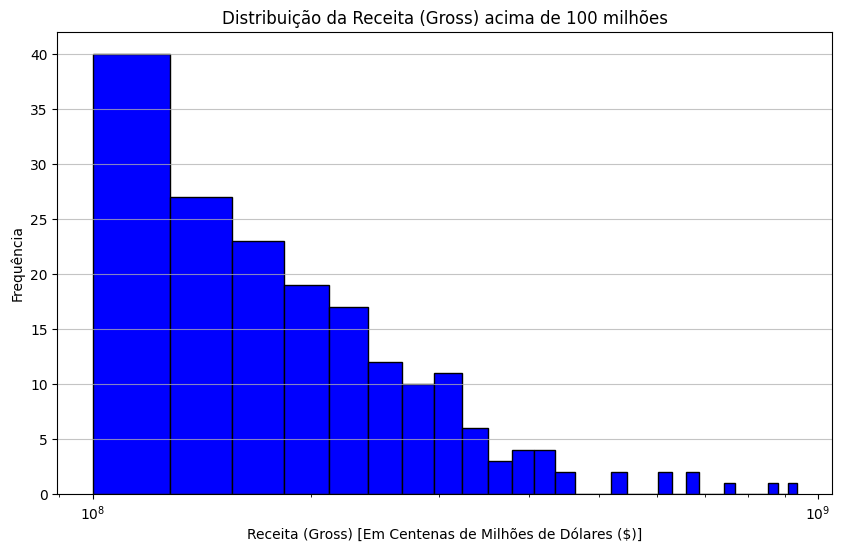

count    1.870000e+02
mean     2.266990e+08
std      1.374060e+08
min      1.000125e+08
25%      1.320808e+08
50%      1.880200e+08
75%      2.757076e+08
max      9.366622e+08
Name: Gross, dtype: float64


In [26]:

# 1. Filtrando para valores de Gross acima de 100 milhões para Melhorar a Interpretaçã0
filtered_gross = df["Gross"][df["Gross"] > 100000000]

# 2. Plotando o histograma na Esacla log no Eixo das Abscissas(x)
plt.figure(figsize=(10, 6))
plt.hist(filtered_gross.dropna(), bins=30, color='blue', edgecolor='black')
plt.title("Distribuição da Receita (Gross) acima de 100 milhões")
plt.xlabel("Receita (Gross) [Em Centenas de Milhões de Dólares ($)]")
plt.ylabel("Frequência")
plt.xscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 3. Exibindo estatísticas descritivas
print(filtered_gross.describe())


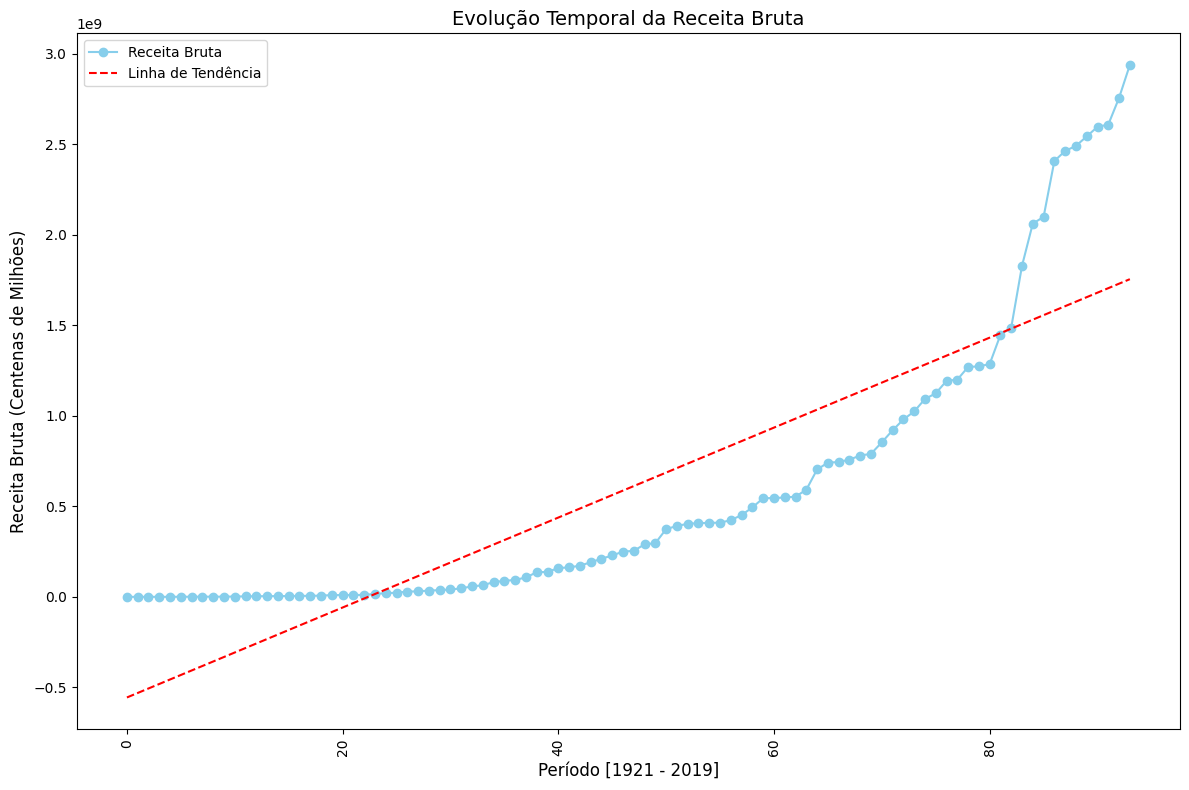

In [27]:


# Filtrando para remover linhas com valores ausentes em Released_Year e Gross
df = df.dropna(subset=['Released_Year', 'Gross'])

# Agrupando por Released_Year e somar a receita bruta
year_gross = df.groupby('Released_Year')['Gross'].sum()


# Forçando a conversão para numérico, substituindo valores inválidos por NaN
year_gross.index = pd.to_numeric(year_gross.index, errors='coerce')

#Removendo quaisquer valores NaN restantes após a conversão
year_gross = year_gross.dropna()

# Ordenando os anos por receita bruta e reindexar
year_gross = year_gross.sort_values().reset_index(drop=True) # Ordena e reindexa

# Plotando a evolução temporal
plt.figure(figsize=(12, 8))
plt.plot(year_gross.index, year_gross.values, marker='o', color='skyblue', label='Receita Bruta')

# Adicionando linha de tendência
z = np.polyfit(year_gross.index, year_gross.values, 1)
p = np.poly1d(z)
plt.plot(year_gross.index, p(year_gross.index), color='red', linestyle='--', label='Linha de Tendência')

# Plotando o gráfico
plt.title("Evolução Temporal da Receita Bruta", fontsize=14)
plt.xlabel("Período [1921 - 2019]", fontsize=12)
plt.ylabel("Receita Bruta (Centenas de Milhões)", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 2.2 Análise Bivariada

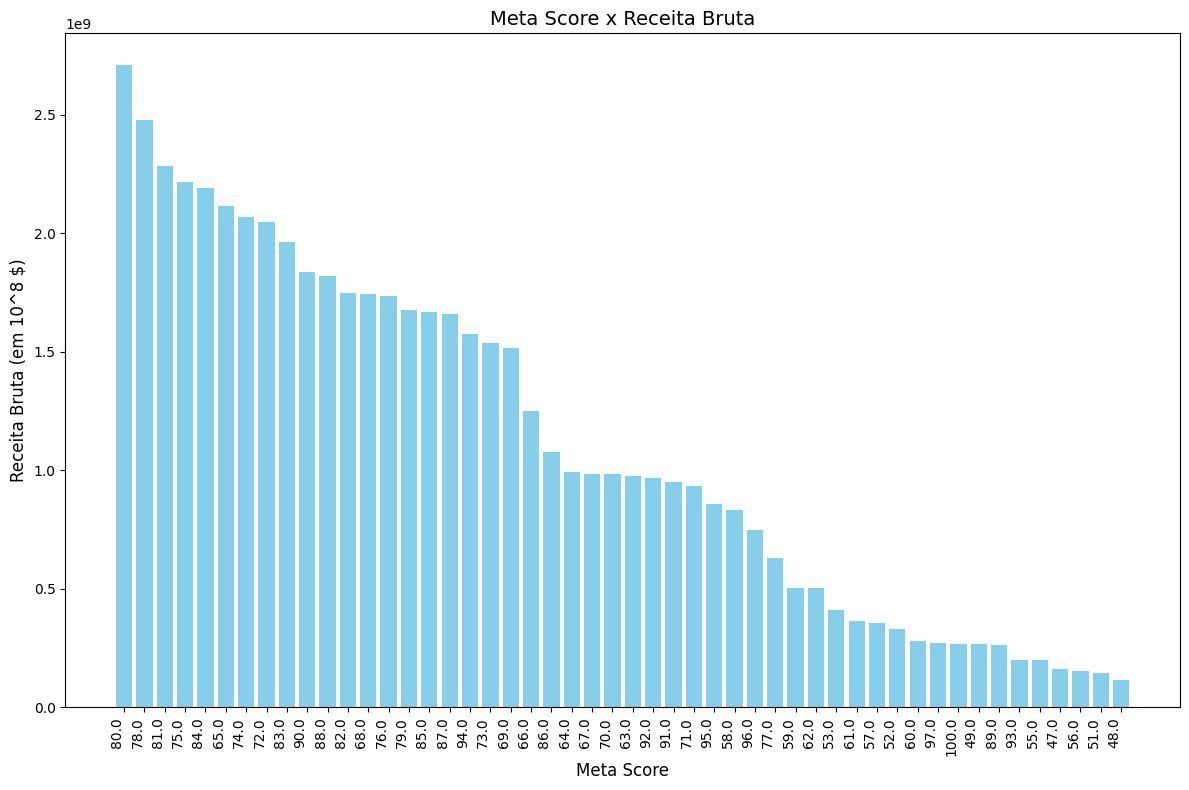

In [35]:
# 1. Definindo a Relação Meta_score x Gross
df = df.dropna(subset=['Meta_score', 'Gross'])
# Filtrando para valores de Gross acima de 100 milhões para melhorar a interpretação
meta_gross = df.groupby('Meta_score')['Gross'].sum()
meta_gross = meta_gross[meta_gross > 100000000]

# 2. Ordenando as categorias por 'gross' em ordem decrescente
meta_gross = meta_gross.sort_values(ascending=False)

# 3. Plotando o Gráfico de Barras
plt.figure(figsize=(12, 8))
plt.bar(meta_gross.index.astype(str), meta_gross.values, color='skyblue')
plt.title("Meta Score x Receita Bruta", fontsize=14)
plt.xlabel("Meta Score", fontsize=12)
plt.ylabel("Receita Bruta (em 10^8 $)", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



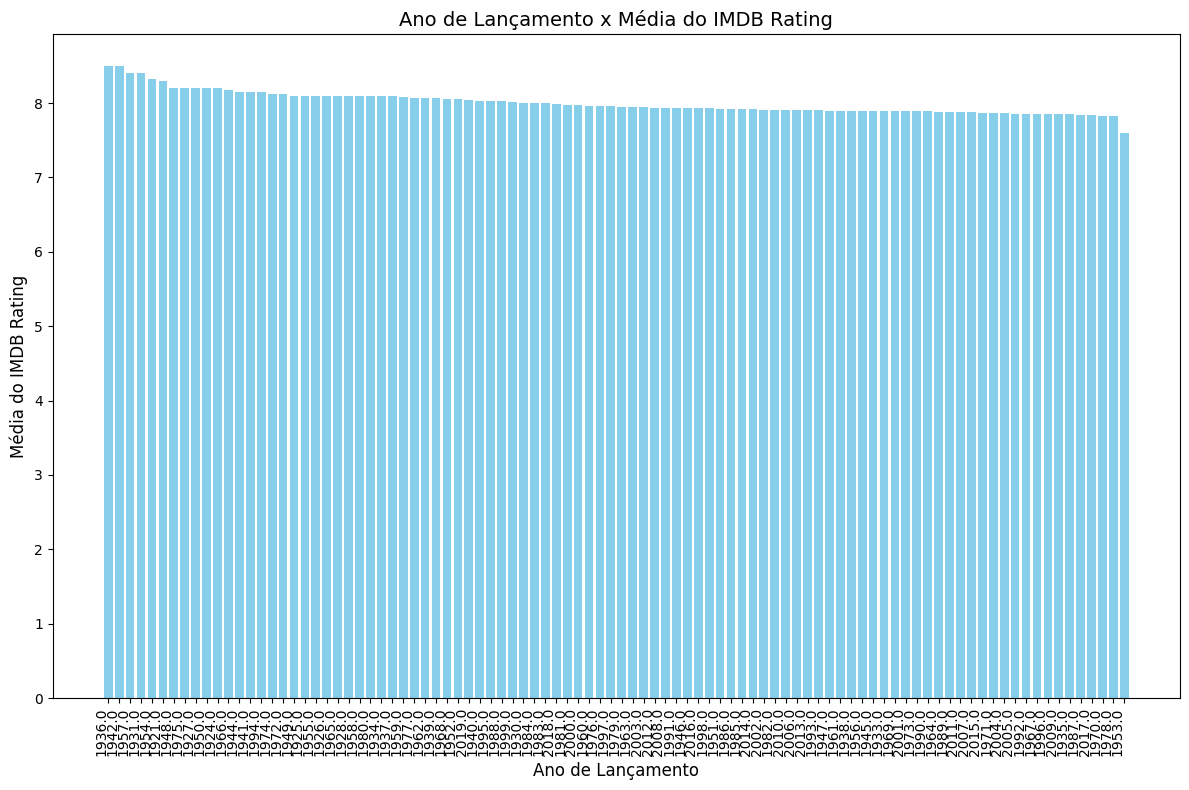

In [34]:
# 1. Definindo a Relação Released_Year x IMDB_Rating
df = df.dropna(subset=['Released_Year', 'IMDB_Rating'])

# Agrupando por Released_Year e calculando a média de IMDB_Rating
released_year_rating = df.groupby('Released_Year')['IMDB_Rating'].mean()

# 2. Ordenando as categorias por 'IMDB_Rating' em ordem decrescente
released_year_rating = released_year_rating[released_year_rating > 0].sort_values(ascending=False)

# 3. Plotando o Gráfico de Barras
plt.figure(figsize=(12, 8))
plt.bar(released_year_rating.index.astype(str), released_year_rating.values, color='skyblue')
plt.title("Ano de Lançamento x Média do IMDB Rating", fontsize=14)
plt.xlabel("Ano de Lançamento", fontsize=12)
plt.ylabel("Média do IMDB Rating", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()




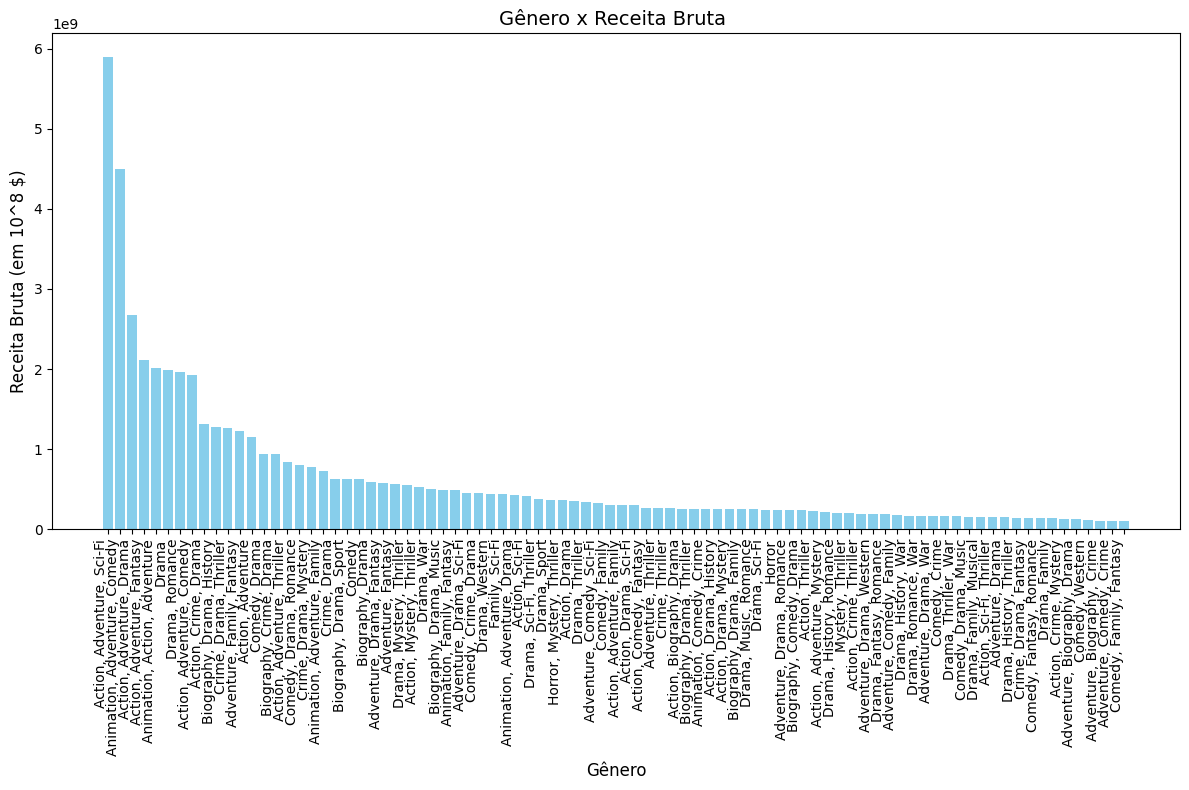

In [33]:

#1. Definido a Relação Genre x Gross
df = df.dropna(subset=['Genre', 'Gross'])
# Filtrando para valores de Gross acima de 100 milhões para Melhorar a Interpretaçã0
genre_gross = df.groupby('Genre')['Gross'].sum()
genre_gross = genre_gross[genre_gross > 100000000]
#2. Ordenando as categorias por 'gross' em ordem decrescente
genre_gross = genre_gross.sort_values(ascending=False)
#3. Plotando o Gráfico de Barras
plt.figure(figsize=(12, 8))
plt.bar(genre_gross.index, genre_gross.values, color='skyblue')
plt.title("Gênero x Receita Bruta ", fontsize=14)
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Receita Bruta (em 10^8 $)", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


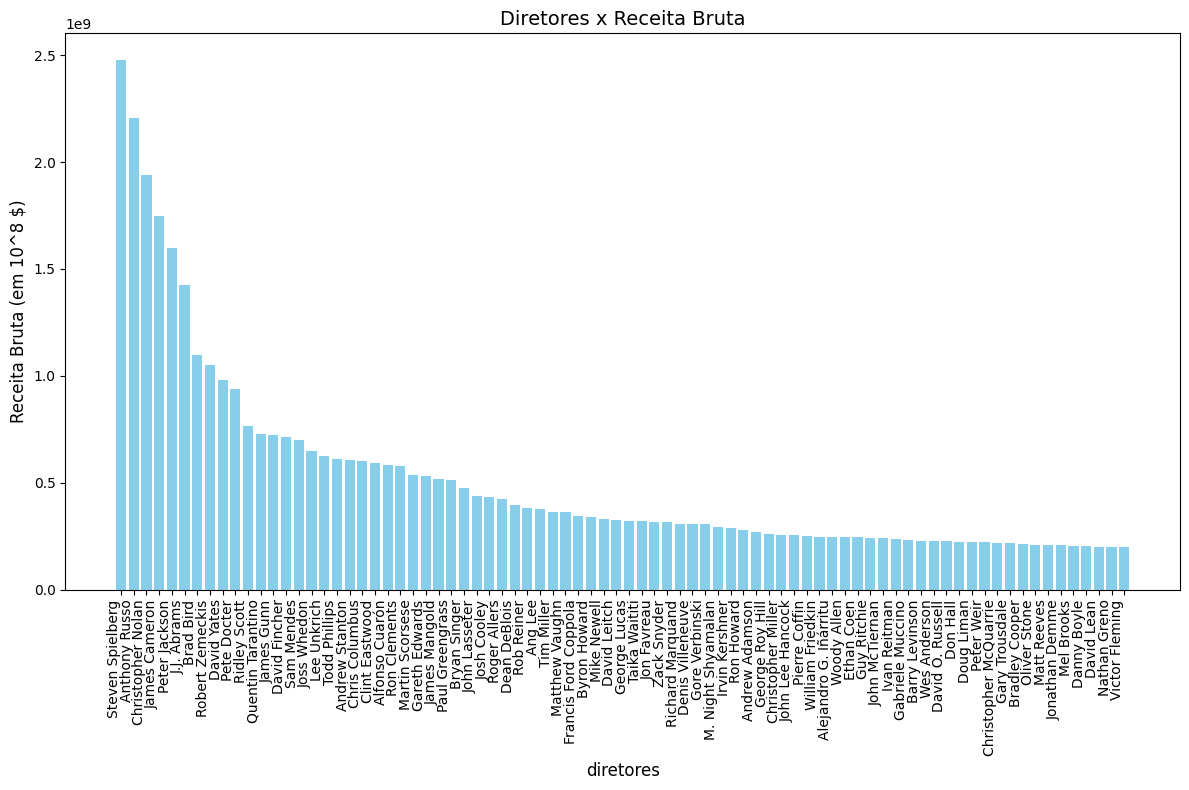

In [32]:
# #1. Definido a Relação Director x Gross
df = df.dropna(subset=['Director', 'Gross'])
director_gross = df.groupby('Director')['Gross'].sum()
# Filtrando para valores de Gross acima de 200 milhões para Melhorar a Interpretaçã0
director_gross = director_gross[director_gross > 200000000]
# Ordenando as categorias por 'gross' em ordem decrescente
director_gross = director_gross.sort_values(ascending=False)
#Plotando o Gráfico de Barras
plt.figure(figsize=(12, 8))  # Aumentar a largura
plt.bar(director_gross.index, director_gross.values, color='skyblue')
plt.title("Diretores x Receita Bruta", fontsize=14)
plt.xlabel("diretores", fontsize=12)
plt.ylabel("Receita Bruta (em 10^8 $)", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### 2.3 Análise Multivariada

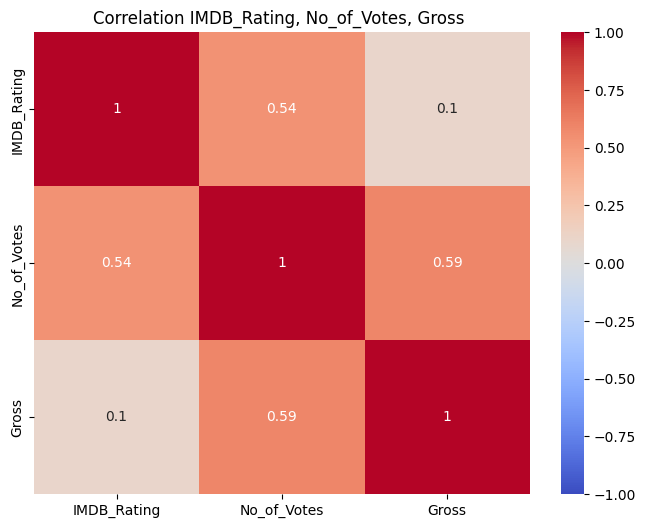

In [31]:
# Selecionando as colunas IMDB_Rating, No_of_Votes, Gross
selected_columns = df[['IMDB_Rating', 'No_of_Votes', 'Gross']]

# Calculando a matriz de correlação
correlation_matrix = selected_columns.corr()
 # Visualizando a matriz de correlação Calculada
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation IMDB_Rating, No_of_Votes, Gross ')
plt.show()

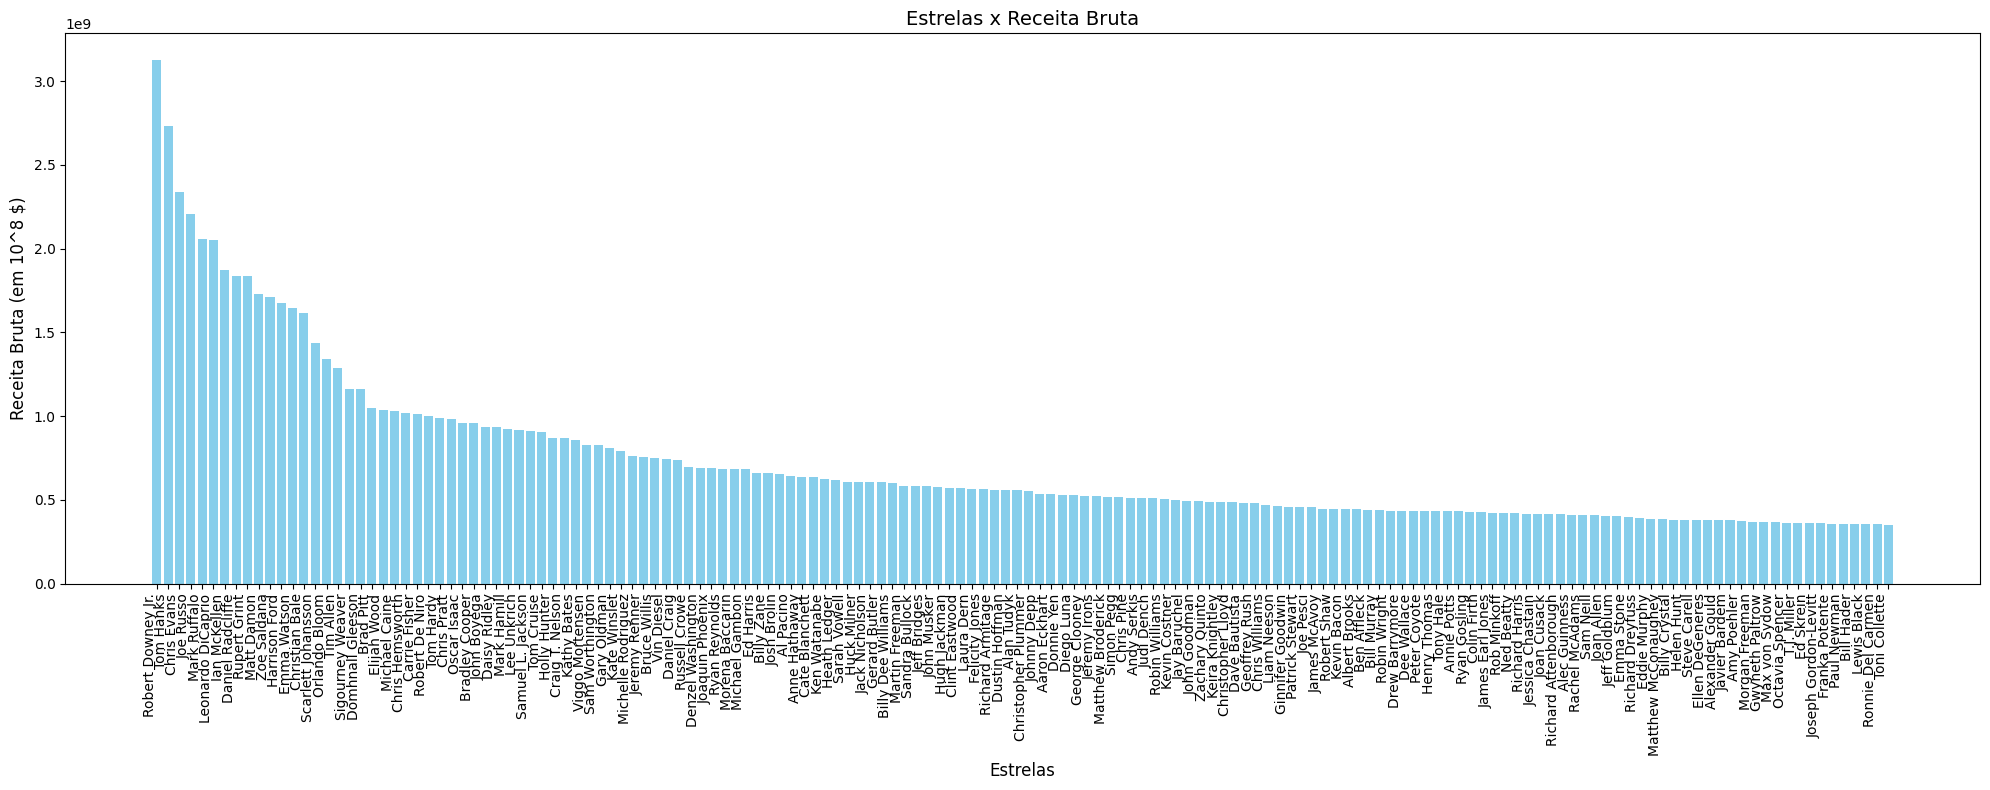

In [30]:

# Filtrando para remover linhas com valores ausentes em Star1 a Star4 e Gross
df = df.dropna(subset=['Star1', 'Star2', 'Star3', 'Star4', 'Gross'])

# Agrupando por cada estrela e somar a receita bruta
star_gross = pd.Series(dtype=float)

for star in ['Star1', 'Star2', 'Star3', 'Star4']:
    star_gross = star_gross.add(df.groupby(star)['Gross'].sum(), fill_value=0)

# Filtrando para estrelas com receita bruta maior que 100.000.000
star_gross = star_gross[star_gross > 350000000]

# Ordenando as estrelas por receita bruta em ordem decrescente
star_gross = star_gross.sort_values(ascending=False)

# Plotando os resultados
plt.figure(figsize=(20, 8))  # Aumentar a largura
plt.bar(star_gross.index, star_gross.values, color='skyblue')
plt.title("Estrelas x Receita Bruta", fontsize=14)
plt.xlabel("Estrelas", fontsize=12)
plt.ylabel("Receita Bruta (em 10^8 $)", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()




## Correlacionando Variáveis e Extraindo Hipóteses:
### 1° Hipótese:
### Seguindo as tendencias da análise pode - se inferir com base gráfico Meta_score x Faturamento que os filmes mais bem avaliados pela crítica são também os mais rentáveis no faturamento.
### 2° Hipótese:
### Temas tradicionais como, Ação, Aventura, Ficção-Cientifíca, Comédia e Drama estão no topo do faturamento, sendo assim opções muito lucrativas.
### 3° Hipótese:
### Filmes com atores e Diretores renomados tendem a ser muito populares, obter notas do IMDB mais e altas e consequentemente teram os maiores faturamentos.
###4° Hipótese: O faturamento dos filmes em geral tem aumentado ao longo do anos de acordo com o período análisado de 1921 a 2019, havendo períodos breves de queda.
### 5° Hipótese: Filmes antigos, especificamente do seculo XX, são mais bem avaliados pela nota do IMDB.

###Respondendo Questões Primordiais:
### a. Qual filme você recomendaria para uma pessoa que você não conhece?
### Para recomendar um filme a um desconhecido, do qual não se tem as informações necessárias para uma escolha personalizada, o ideal é indicar o filme de melhor popularidade entre os assistiram. Neste caso o filme seria "The Shawshank Redemption" (1994), que segundo seu overview se trata de um drama carcerário com toques de esperança e amizade.

###b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
### Segundo a EDA realizada, os principais fatores que afetam o faturamento são, o gênero, a composição do elenco, o marketing realizado no filme e a percepção das críticas em geral, segue a explicação detalhada:
###Gênero: Filmes de Ação, Aventura, Ficção-científica e Fantasia costumam ter maior apelo comercial.
###Elenco: A presença de atores famosos e populares bem como diretores consolidados pode atrair um público maior.
###Orçamento: Filmes com maior orçamento podem investir em efeitos especiais, marketing e distribuição, aumentando a visibilidade e o interesse do público.
###Marketing: Campanhas publicitárias eficientes e bem direcionadas podem gerar grande expectativa e aumentar o número de espectadores.
###Recepção da crítica: Críticas positivas e premiações podem influenciar a decisão do público em assistir ao filme.

###Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
###A coluna Overview fornece uma breve sinopse do enredo do filme, permitindo identificar temas, personagens e conflitos principais. É possível inferir o gênero do filme a partir da Overview, mas nem sempre com precisão.
### Por exemplo, a sinopse de "The Godfather" (1972) menciona "crime" e "dinastia", indicando um filme de Gângster. Já a sinopse de "Spirited Away" (2001) descreve uma "menina" que "entra em um mundo governado por deuses", sugerindo um filme de Fantasia.
### Entretanto, algumas sinopses podem ser ambíguas. A sinopse de "Inception" (2010) menciona "roubo de segredos corporativos" e "tecnologia de compartilhamento de sonhos", dificultando a definição precisa do gênero, que mescla Ação, Sci-Fi e Thriller.
### Em suma, a coluna Overview pode fornecer pistas sobre o gênero do filme, mas a análise de outras variáveis, como as palavras-chave na sinopse, o elenco, o diretor e o ano de lançamento, contribuem para uma classificação mais precisa. Para detectar palavras chaves pode se usar o código abaixo:


In [ ]:
import pandas as pd

imdb_data = pd.read_csv('imdb_data.csv')

# Exemplo de como extrair palavras-chave da coluna Overview
imdb_data['Keywords'] = imdb_data['Overview'].str.lower().str.split()

# Exibir as palavras-chave para alguns filmes
print(imdb_data[['Overview', 'Keywords']].head())


## Prevendo Resultados com Machine Learning
### 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

A previsão da nota do IMDb pode ser realizada com técnicas de aprendizado de máquina, especificamente por meio de um modelo de regressão.

Para essa tarefa, utilizaremos as seguintes variáveis e transformações:

Variáveis Categóricas:

Certificate, Genre, Director, Star1, Star2, Star3, Star4: Serão transformadas em codificação One-Hot para que o modelo consiga processar as informações categóricas.

Variáveis Numéricas:

Released_Year: Pode ser utilizada como está ou transformada em variáveis categóricas (ex: "Anos 70", "Anos 80", etc.) para capturar padrões específicos de épocas.

Runtime: Pode ser utilizada como está.

No_of_Votes: Será transformada em logaritmo para reduzir a influência de valores extremos e obter uma distribuição mais equilibrada.

Meta_score: Será utilizada como está, com o tratamento de valores faltantes definido.

Gross: Será utilizada como está, com o tratamento de valores faltantes definido.

A transformação das variáveis categóricas e a normalização das variáveis numéricas visam melhorar o desempenho do modelo.

Dentre os modelos de regressão, a Random Forest se destaca como uma opção ideal. Ela é um modelo de ensemble que combina várias árvores de decisão para realizar a previsão, diminuindo o risco de overfitting.

Prós:

Alta precisão em dados com relações não-lineares complexas.

Robusto a outliers.

Boa capacidade de generalização.

Contras:

Maior tempo de treinamento em relação a modelos mais simples.

Dificuldade de interpretação em relação a modelos lineares.

Para avaliar o desempenho do modelo, a métrica RMSE (Erro Quadrático Médio) será utilizada. Essa medida é sensível a erros grandes e fornece uma indicação precisa do erro médio de previsão.










### 4. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
'Released_Year': '1994',
'Certificate': 'A',
'Runtime': '142 min',
'Genre': 'Drama',
'Overview': 'Two imprisoned men bond over a number of years,
finding solace and eventual redemption through acts of common
decency.',
'Meta_score': 80.0,
'Director': 'Frank Darabont',
'Star1': 'Tim Robbins',
'Star2': 'Morgan Freeman',
'Star3': 'Bob Gunton',
'Star4': 'William Sadler',
'No_of_Votes': 2343110,
'Gross': '28,341,469'}
### Segundo o modelo abaixo a nota IMDB para o filme 'The Shawshank Redemption' é: 9.30

In [36]:





# 3.1. Selecionando as Pistas: Variáveis
features = ['Released_Year', 'Runtime', 'Genre', 'Meta_score', 'No_of_Votes', 'Gross']
X = df[features]
y = df['IMDB_Rating']

# 3.2. Criando o Modelo: Regressão Linear
# Verificar o tipo de dado da coluna 'Runtime' antes de tentar converter
if X['Runtime'].dtype == object:  # Verifica se a coluna é do tipo objeto (string)
    X['Runtime'] = X['Runtime'].str.replace(' min', '').astype(float)

# Converter a coluna 'Genre' para numérico
le = LabelEncoder()
X['Genre'] = le.fit_transform(X['Genre'])

# 3.3. Preparando os Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.4. Ensinando o Modelo: Treinamento
model = LinearRegression()
model.fit(X_train, y_train)

# 3.5. Testando o Modelo: Avaliação
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"\nRMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# 3.6. Salvando o Modelo
filename = 'modelo_imdb.pkl'
pickle.dump(model, open(filename, 'wb'))

# 4. Prevendo o Futuro
# Criar um DataFrame com as características do filme
new_film = pd.DataFrame({
    'Released_Year': [1994],
    'Runtime': [142],
    'Genre': ['Drama'],
    'Meta_score': [80.0],
    'No_of_Votes': [2343110],
    'Gross': [28341469.0]
})

# Verificar o tipo de dado da coluna 'Runtime' antes de tentar converter
if new_film['Runtime'].dtype == object:  # Verifica se a coluna é do tipo objeto (string)
    new_film['Runtime'] = new_film['Runtime'].str.replace(' min', '').astype(float)


# Converter 'Genre' para numérico
new_film['Genre'] = le.transform(new_film['Genre'])

# Fazer a previsão da nota do IMDB
predicted_rating = model.predict(new_film[features])
print(f"\nA nota prevista para o filme 'The Shawshank Redemption' é: {predicted_rating[0]:.2f}")


RMSE: 0.195
R²: 0.528

A nota prevista para o filme 'The Shawshank Redemption' é: 9.30


<ipython-input-36-deb8c5526deb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Runtime'] = X['Runtime'].str.replace(' min', '').astype(float)
<ipython-input-36-deb8c5526deb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = le.fit_transform(X['Genre'])


##Requisitos:
###pandas==1.5.3
###numpy==1.24.2
###matplotlib==3.6.2
###seaborn==0.12.2
###scikit-learn==1.2.2
###pickle==5.0